In [5]:
!ls logs/w16s0n100

joint  reweight  subsample


In [15]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os, sys, json, argparse
import pickle
import matplotlib.ticker as ticker

widths = [16, 50]
reweight_log_dirs = [f'logs/w{width}s0n100/reweight' for width in widths]
subsample_log_dirs = [f'logs/w{width}s0n100/subsample' for width in widths]
jointtrain_log_dirs = [f'logs/w{width}s0n100/joint' for width in widths]

keys = ['epoch', 'total_acc', 'group0_acc', 'group1_acc', 'group2_acc',
        'group3_acc', 'split_acc', 'loss', 'avg_margin', 'group0_margin',
        'group1_margin', 'group2_margin', 'group3_margin']


def plot_accuracies(rundir, name=None, axs=None):
    splits = ['train','val']
    if axs is None:
        fig, ax = plt.subplots() 
    else:
        ax = axs
    for split in splits:
        print(f"Processing {rundir}")
        if not os.path.exists(rundir):
            print(f"Not found {rundir}")

        log_path = os.path.join(rundir, f'{split}.csv')
        if not os.path.exists(log_path):
            print(f'{log_path} not found')

        df = pd.read_csv(log_path)
        ax.plot(df['epoch'], df['total_acc'], label=f'{split} total_acc')
#         ax.plot(df['epoch'], df['split_acc'], label=f'{split} split_acc')
        ax.plot(df['epoch'], df['total_acc:g3'], label=f'{split} worst_group_acc')
    ax.set(xlabel='Epoch', ylabel='Accuracy',
       title=('Accuracies' if name is None else name))
    ax.legend()
    start, end = ax.get_ylim()
    ax.yaxis.set_ticks(np.arange(start,end,.05))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))
    ax.grid()
    return ax

def plot_margins(rundir, name=None, axs=None):
    splits = ['train','val']
    if axs is None:
        fig, ax = plt.subplots() 
    else:
        ax = axs
    for split in splits:
        print(f"Processing {rundir}")
        if not os.path.exists(rundir):
            print(f"Not found {rundir}")

        log_path = os.path.join(rundir, f'{split}.csv')
        if not os.path.exists(log_path):
            print(f'{log_path} not found')

        df = pd.read_csv(log_path)
        ax.plot(df['epoch'], df['avg_margin'], label=f'{split} avg_margin')
        ax.plot(df['epoch'], df['group3_margin'], label=f'{split} worst_group_margin')
    ax.set(xlabel='Epoch', ylabel='Margin',
       title=('Margins over epochs' if name is None else name))
    ax.legend()
    ax.grid()
    return ax

Processing logs/w50s0n100/joint
Processing logs/w50s0n100/joint
Processing logs/w50s0n100/joint
Processing logs/w50s0n100/joint
Processing logs/w50s0n100/reweight
Processing logs/w50s0n100/reweight
Processing logs/w50s0n100/reweight
Processing logs/w50s0n100/reweight
Processing logs/w50s0n100/subsample
Processing logs/w50s0n100/subsample
Processing logs/w50s0n100/subsample
Processing logs/w50s0n100/subsample


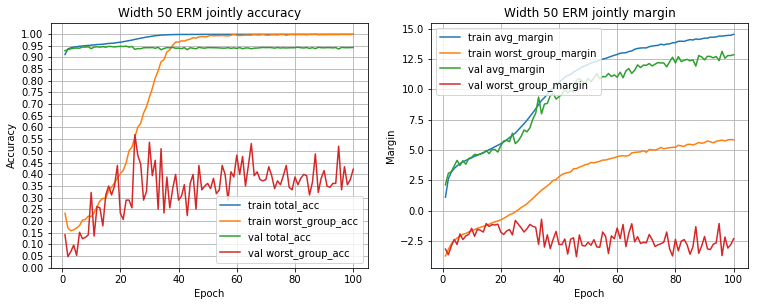

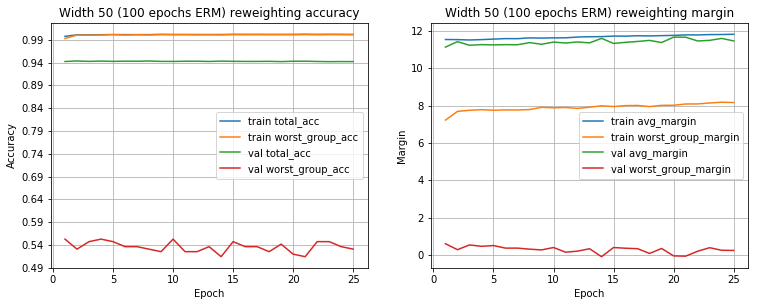

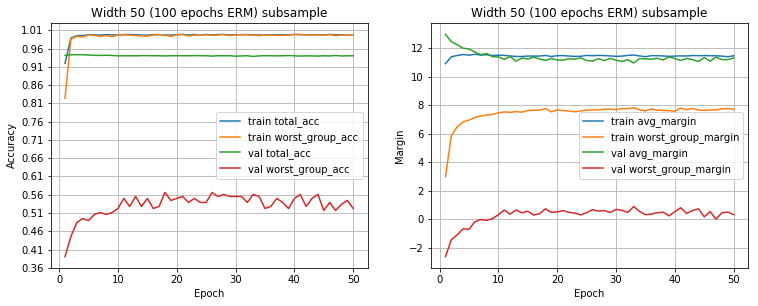

In [18]:
idx = 1
width = 50
epochs = 100

fig0, (ax, ax0) = plt.subplots(1,2)
fig0.set_size_inches(12.5, 4.5)
plot_accuracies(jointtrain_log_dirs[idx], f'Width {width} ERM jointly accuracy', ax)
plot_margins(jointtrain_log_dirs[idx], f'Width {width} ERM jointly margin', ax0)


fig1, (ax1, ax2) = plt.subplots(1,2)
fig1.set_size_inches(12.5, 4.5)
plot_accuracies(reweight_log_dirs[idx], f'Width {width} ({epochs} epochs ERM) reweighting accuracy', ax1)
plot_margins(reweight_log_dirs[idx], f'Width {width} ({epochs} epochs ERM) reweighting margin', ax2)



fig2, (ax3, ax4) = plt.subplots(1,2)
fig2.set_size_inches(12.5, 4.5)
plot_accuracies(subsample_log_dirs[idx], f'Width {width} ({epochs} epochs ERM) subsample', ax3)
plot_margins(subsample_log_dirs[idx], f'Width {width} ({epochs} epochs ERM) subsample', ax4)



Processing w16s0_reweight_log
Processing w16s0_reweight_log
Processing w16_finetune_subsample_log
Processing w16_finetune_subsample_log
Processing w16_seed0_log
Processing w16_seed0_log


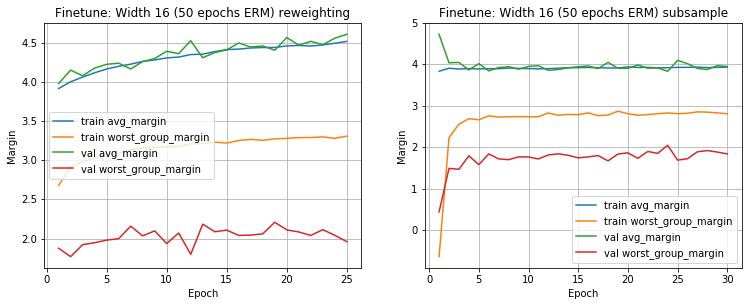

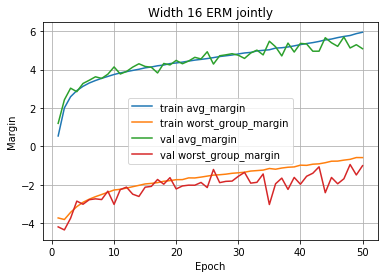

Processing w50_seed0_log
Processing w50_seed0_log


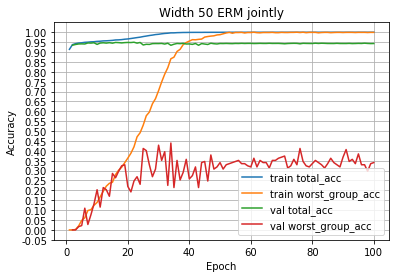

In [86]:
ax = plot_accuracies(jointtrain_log_dirs[1], 'Width 50 ERM jointly')

{'_is_copy': None,
 '_data': BlockManager
 Items: Index(['epoch', 'total_acc', 'group0_acc', 'group1_acc', 'group2_acc',
        'group3_acc', 'split_acc', 'loss', 'avg_margin', 'group0_margin',
        'group1_margin', 'group2_margin', 'group3_margin'],
       dtype='object')
 Axis 1: RangeIndex(start=0, stop=50, step=1)
 FloatBlock: slice(1, 13, 1), 12 x 50, dtype: float64
 IntBlock: slice(0, 1, 1), 1 x 50, dtype: int64,
 '_item_cache': {'epoch': 0      1
  1      2
  2      3
  3      4
  4      5
  5      6
  6      7
  7      8
  8      9
  9     10
  10    11
  11    12
  12    13
  13    14
  14    15
  15    16
  16    17
  17    18
  18    19
  19    20
  20    21
  21    22
  22    23
  23    24
  24    25
  25    26
  26    27
  27    28
  28    29
  29    30
  30    31
  31    32
  32    33
  33    34
  34    35
  35    36
  36    37
  37    38
  38    39
  39    40
  40    41
  41    42
  42    43
  43    44
  44    45
  45    46
  46    47
  47    48
  48    49
  49    50